In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# IHC Experiment

In [2]:
ihc_metab_md = pd.read_table('../data/Metabolome/longIHC_metab_metadata_cleaned.txt', sep='\t', index_col=0)
ihc_metab_md

,filename,micro-sample-id,cage_food_consumption_g,cage_location,cage_number,diet,exposure_type,genotype,host_age,host_age_units,host_subject_id,host_weight,host_weight_units,mouse_number,sample_type
sample-id,,,,,,,,,,,,,,,
A15_85_01,A15_85_01.mzXML,11548.A15.85.1,not applicable,On shelf,A15,Regular chow,Air,ApoE KO,10.0,weeks,Mouse 85,26.5,g,85,feces
A15_85_02,A15_85_02.mzXML,11548.A15.85.2,56.6,On shelf,A15,Regular chow,Air,ApoE KO,10.5,weeks,Mouse 85,26.7,g,85,feces
A15_85_03,A15_85_03.mzXML,11548.A15.85.3,85.9,On shelf,A15,Regular chow,Air,ApoE KO,11.0,weeks,Mouse 85,27.2,g,85,feces
A15_85_04,A15_85_04.mzXML,11548.A15.85.4,59.3,On shelf,A15,Regular chow,Air,ApoE KO,11.5,weeks,Mouse 85,27.4,g,85,feces
A15_85_05,A15_85_05.mzXML,11548.A15.85.5,81,On shelf,A15,Regular chow,Air,ApoE KO,12.0,weeks,Mouse 85,27.6,g,85,feces
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Blank_G1_5uL_PreTP15_01,Blank_G1_5uL_PreTP15_01.mzXML,not applicable,Not provided,not applicable,not applicable,not applicable,not applicable,not applicable,0.0,weeks,not applicable,Not provided,not applicable,0,not applicable
Blank_G1_5uL_PreTP15_02,Blank_G1_5uL_PreTP15_02.mzXML,not applicable,Not provided,not applicable,not applicable,not applicable,not applicable,not applicable,0.0,weeks,not applicable,Not provided,not applicable,0,not applicable
Blank_G1_5uL_PreTP20_01,Blank_G1_5uL_PreTP20_01.mzXML,not applicable,Not provided,not applicable,not applicable,not applicable,not applicable,not applicable,0.0,weeks,not applicable,Not provided,not applicable,0,not applicable


In [3]:
ihc_metab_mols = pd.read_table('../data/Metabolome/longIHC_allunique_noblanks_relfreq.txt', sep='\t', index_col=0)
ihc_metab_mols.head()

,"(2S,3S,4S,5R,6R)-6-[[(3S,4S,6aR,6bS,8aR,9R,12aS,14bR)-9-hydroxy-4-(hydroxymethyl)-4,6a,6b,8a,11,11,14b-heptamethyl-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicen-3-yl]oxy]-5-[(2S,3R,4S,5R,6R)-4,5-dihydroxy-6-(hydroxymethyl)-3-[(2S,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxyoxan-2-yl]oxy-3,4-dihydroxyoxane-2-carboxylic acid","(2S,4R)-4-((3R,5S,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)-2-hydroxypentanoic acid","(4R)-4-((1R,3S,5S,7R,9S,10S,12S,13R,14S,17R)-1,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4aR,5S)-9,9a-dihydroxy-3,4a,5-trimethyl-5,6,7,8,8a,9-hexahydro-4H-benzo[f][1]benzofuran-2-one","(R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pent-2-enoic acid",...,a-Muricholic acid,alpha-TOCHOPHERYL ACETATE,b-Muricholic acid,cordycepin,hyocholic acid,"methyl (4R)-4-((3R,5S,7R,9S,10S,13R,15R,17R)-3,7,15-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoate",sphingosin C16 (Artifact)-emf,taurocholic acid,taurohyodeoxycholic acid,tauroursodeoxycholic acid
A15_85_15,0.008588,0.000862,0.006151,0.015101,0.016464,0.061358,0.034855,0.026011,0.000059,0.013372,...,0.040514,0.0,0.043981,0.042551,0.001493,0.023498,0.086663,0.001727,0.000421,0.000000
A15_86_01,0.007044,0.022056,0.010572,0.019103,0.041065,0.182771,0.135433,0.117675,0.000081,0.040236,...,0.254319,0.0,0.525776,0.124233,0.010321,0.166251,0.040021,0.002238,0.006039,0.000092
A15_86_15,0.007671,0.000271,0.001471,0.008001,0.029983,0.027987,0.010048,0.041472,0.000070,0.014825,...,0.434414,0.0,0.049060,0.047262,0.005980,0.017559,0.102026,0.001359,0.000077,0.000000
A15_85_10,0.029511,0.001672,0.006419,0.008232,0.008480,0.028726,0.033301,0.067106,0.000000,0.022357,...,0.137931,0.0,0.136383,0.063552,0.000293,0.024302,0.031060,0.000465,0.000429,0.000000
A15_86_10,0.007590,0.000188,0.006027,0.011919,0.025891,0.013471,0.009704,0.078954,0.000165,0.027284,...,0.224543,0.0,0.085288,0.038982,0.000783,0.019783,0.037809,0.000477,0.000533,0.000000


In [4]:
#ihc_metab_mols = ihc_metab_mols.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
#                                                                               'TRYPTOPHAN': 'Tryptophan', 
#                   'Spectral Match to 1-Octadecanoyl-2-octadecenoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_18_0_18_1', 
#                   'LAUROYLCARNITINE': 'Lauroylcarnitine', 
#                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
#                  'Ursodeoxycholic acid': 'UDCA'})

In [5]:
ihc_mols_relfreq = pd.merge(ihc_metab_mols, ihc_metab_md, left_index=True, right_index=True)
ihc_mols_relfreq.head()

,"(2S,3S,4S,5R,6R)-6-[[(3S,4S,6aR,6bS,8aR,9R,12aS,14bR)-9-hydroxy-4-(hydroxymethyl)-4,6a,6b,8a,11,11,14b-heptamethyl-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicen-3-yl]oxy]-5-[(2S,3R,4S,5R,6R)-4,5-dihydroxy-6-(hydroxymethyl)-3-[(2S,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxyoxan-2-yl]oxy-3,4-dihydroxyoxane-2-carboxylic acid","(2S,4R)-4-((3R,5S,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)-2-hydroxypentanoic acid","(4R)-4-((1R,3S,5S,7R,9S,10S,12S,13R,14S,17R)-1,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4aR,5S)-9,9a-dihydroxy-3,4a,5-trimethyl-5,6,7,8,8a,9-hexahydro-4H-benzo[f][1]benzofuran-2-one","(R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pent-2-enoic acid",...,diet,exposure_type,genotype,host_age,host_age_units,host_subject_id,host_weight,host_weight_units,mouse_number,sample_type
A15_85_15,0.008588,0.000862,0.006151,0.015101,0.016464,0.061358,0.034855,0.026011,0.000059,0.013372,...,Regular chow,Air,ApoE KO,17.0,weeks,Mouse 85,30.5,g,85,feces
A15_86_01,0.007044,0.022056,0.010572,0.019103,0.041065,0.182771,0.135433,0.117675,0.000081,0.040236,...,Regular chow,Air,ApoE KO,10.0,weeks,Mouse 86,27,g,86,feces
A15_86_15,0.007671,0.000271,0.001471,0.008001,0.029983,0.027987,0.010048,0.041472,0.000070,0.014825,...,Regular chow,Air,ApoE KO,17.0,weeks,Mouse 86,28.4,g,86,feces
A15_85_10,0.029511,0.001672,0.006419,0.008232,0.008480,0.028726,0.033301,0.067106,0.000000,0.022357,...,Regular chow,Air,ApoE KO,14.5,weeks,Mouse 85,28.7,g,85,feces
A15_86_10,0.007590,0.000188,0.006027,0.011919,0.025891,0.013471,0.009704,0.078954,0.000165,0.027284,...,Regular chow,Air,ApoE KO,14.5,weeks,Mouse 86,27.9,g,86,feces


In [6]:
ihc_mols_relfreq_renamed = ihc_mols_relfreq.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Myristoyl-sn-glycero-3-phosphocholine from NIST14': 'LPC_14_0', 
                   'Spectral Match to Oleoyl L-carnitine from NIST14': 'Oleoyl L-carnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})
#the UDCA and DCA chosen were the level 1 IDs, other level 2 IDs exist. 1/2 of the Tryptophan IDs was selected
#conjugated Lineoleic acid - CLA - fermented foods - Bryn

In [7]:
molelist = ['TbMCA', 'Tryptophan', 'LPC_14_0', 'Oleoyl L-carnitine', 'LysoPE_18_0', 'UDCA']

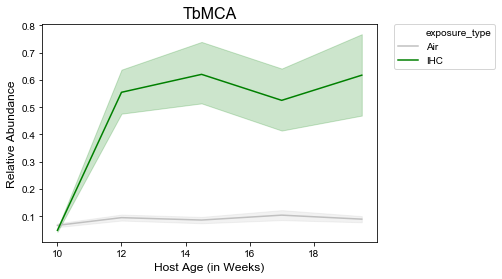

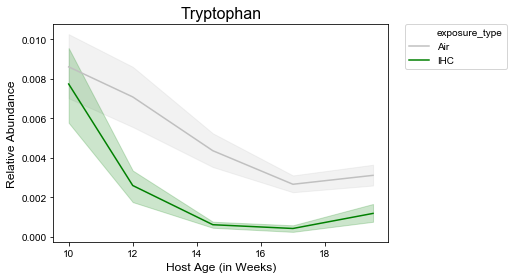

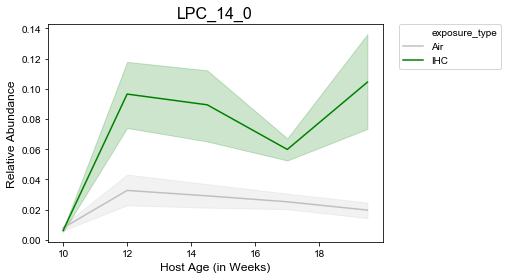

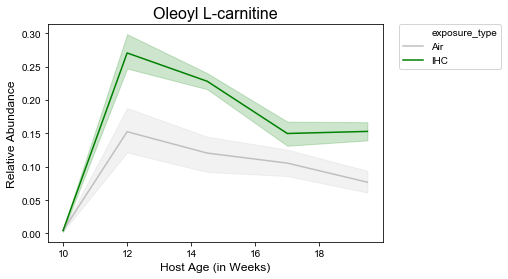

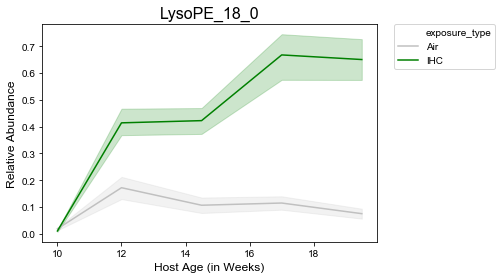

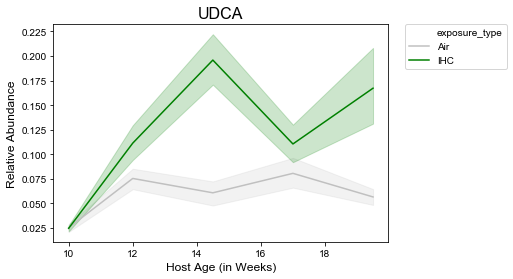

In [8]:
for mol in molelist:
    g = sns.lineplot(x='host_age', y=mol, hue='exposure_type', ci=68, 
                     palette=['silver', 'green'], data=ihc_mols_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(mol, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/IHC/longIHC_metab_SEM_%s.svg' % mol, dpi=300, bbox_inches = "tight")
    plt.show()

# IH_IC Experiment

In [4]:
ihic_metab_md = pd.read_table('../data/Metabolome/Haddad_IH_IC_MetaData.txt', sep='\t', index_col=0)
ihic_metab_md.head()

,qiita_name,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,description,diet,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
sample-id,,,,,,,,,,,,,,,,,,,,,
A34_135_1,11829.A34.135.1,weeks,A34.135.1,Not applicable,On shelf,NaN,A34,4/3/18 12:00,Mouse 135 baseline stool collection 1 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_10,11829.A34.135.10,weeks,A34.135.10,18,On shelf,NaN,A34a,5/4/18 12:00,Mouse 135 stool collection 10 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_11,11829.A34.135.11,weeks,A34.135.11,23.9,On shelf,NaN,A34a,5/8/18 12:00,Mouse 135 stool collection 11 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_12,11829.A34.135.12,weeks,A34.135.12,17.4,On shelf,NaN,A34a,5/11/18 12:00,Mouse 135 stool collection 12 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_13,11829.A34.135.13,weeks,A34.135.13,23.1,On shelf,NaN,A34a,5/15/18 12:00,Mouse 135 stool collection 13 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [5]:
ihic_metab_mols = pd.read_table('../data/Metabolome/longIHIC_allunique_noblanks_relfreq.txt', sep='\t', index_col=0)
ihic_metab_mols.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid,gmelinol,hyocholic acid,sphingosin C16 (Artifact)-emf,taurocholic acid,taurohyodeoxycholic acid,threonine conjugated cholic acid,xanthohumol
A36_144_2,0.375385,0.069536,0.031704,0.012435,0.047391,0.014178,0.121005,0.144555,0.000071,0.002206,...,0.002040,0.178099,0.097386,0.008264,0.003788,0.104363,0.016469,0.003787,0.000182,0.031576
A36_145_2,0.304815,0.063607,0.026294,0.021616,0.030888,0.028128,0.105111,0.064325,0.000106,0.001496,...,0.001904,0.264515,0.162340,0.005174,0.008293,0.022904,0.026090,0.003635,0.000866,0.010885
A36_146_2,0.318998,0.074815,0.033500,0.014315,0.027868,0.007893,0.109808,0.103266,0.000121,0.001146,...,0.005439,0.215188,0.129330,0.008907,0.008088,0.079875,0.018518,0.003721,0.000255,0.014142
A36_145_1,0.123710,0.040281,0.020029,0.003910,0.021421,0.002388,0.027319,0.053149,0.000000,0.051469,...,0.000458,0.117326,0.032199,0.103328,0.003485,0.122591,0.008691,0.001066,0.000208,0.046962
A35_139_1,0.099870,0.011379,0.001343,0.002126,0.002883,0.015178,0.019089,0.028164,0.000000,0.062247,...,0.000105,0.113387,0.015561,0.149509,0.002818,0.090604,0.011704,0.002739,0.000202,0.043920


In [6]:
ihic_metab_mols = ihic_metab_mols.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Myristoyl-sn-glycero-3-phosphocholine from NIST14': 'LPC_14_0', 
                   'Spectral Match to Oleoyl L-carnitine from NIST14': 'Oleoyl L-carnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})

In [7]:
ihic_mols_relfreq = pd.merge(ihic_metab_mols, ihic_metab_md, left_index=True, right_index=True)
ihic_mols_relfreq.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A36_144_2,0.375385,0.069536,0.031704,0.012435,0.047391,0.014178,0.121005,0.144555,0.000071,0.002206,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,0.304815,0.063607,0.026294,0.021616,0.030888,0.028128,0.105111,0.064325,0.000106,0.001496,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,0.318998,0.074815,0.033500,0.014315,0.027868,0.007893,0.109808,0.103266,0.000121,0.001146,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,0.123710,0.040281,0.020029,0.003910,0.021421,0.002388,0.027319,0.053149,0.000000,0.051469,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_139_1,0.099870,0.011379,0.001343,0.002126,0.002883,0.015178,0.019089,0.028164,0.000000,0.062247,...,Mouse 139,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


## IH vs Air

In [13]:
ih_mols_relfreq = ihic_mols_relfreq[ihic_mols_relfreq['exposure_type'] != 'IC'].copy()
ih_mols_relfreq.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A36_144_2,0.375385,0.069536,0.031704,0.012435,0.047391,0.014178,0.121005,0.144555,0.000071,0.002206,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,0.304815,0.063607,0.026294,0.021616,0.030888,0.028128,0.105111,0.064325,0.000106,0.001496,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,0.318998,0.074815,0.033500,0.014315,0.027868,0.007893,0.109808,0.103266,0.000121,0.001146,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,0.123710,0.040281,0.020029,0.003910,0.021421,0.002388,0.027319,0.053149,0.000000,0.051469,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_139_1,0.099870,0.011379,0.001343,0.002126,0.002883,0.015178,0.019089,0.028164,0.000000,0.062247,...,Mouse 139,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [14]:
ih_mols_relfreq_renamed = ih_mols_relfreq.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Myristoyl-sn-glycero-3-phosphocholine from NIST14': 'LPC_14_0', 
                   'Spectral Match to Oleoyl L-carnitine from NIST14': 'Oleoyl L-carnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})
#the UDCA and DCA chosen were the level 1 IDs, other level 2 IDs exist. 1/2 of the Tryptophan IDs was selected

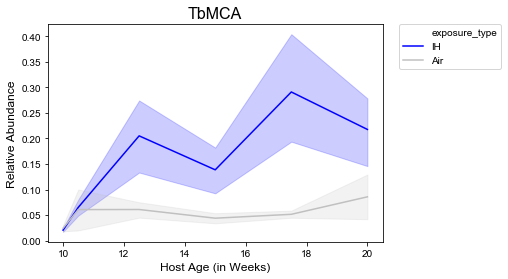

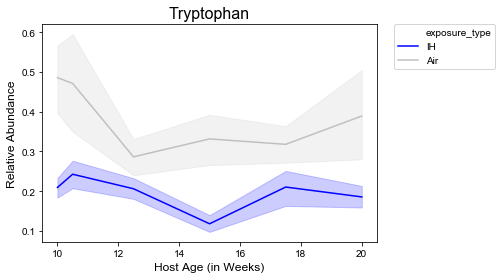

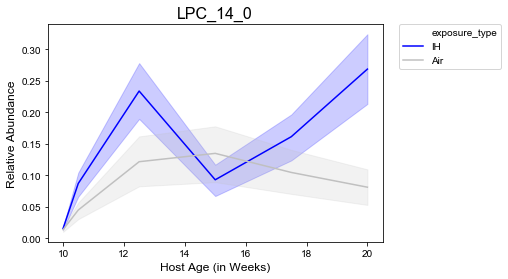

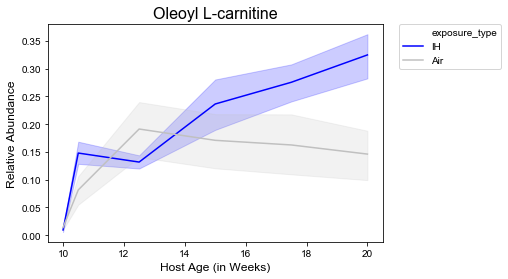

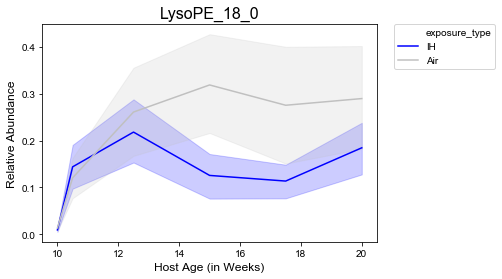

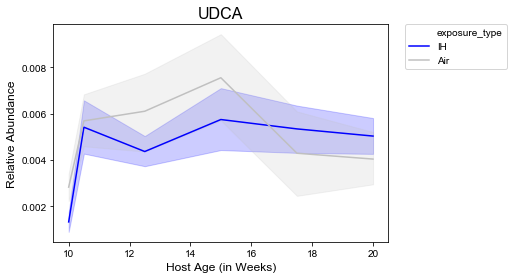

In [15]:
for mol in molelist:
    g = sns.lineplot(x='host_age', y=mol, hue='exposure_type', ci=68, 
                     palette=['blue', 'silver'], data=ih_mols_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(mol, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/IH/longIH_metab_SEM_%s.svg' % mol, dpi=300, bbox_inches = "tight")
    plt.show()

## IC vs Air

In [8]:
ic_mols_relfreq = ihic_mols_relfreq[ihic_mols_relfreq['exposure_type'] != 'IH'].copy()
ic_mols_relfreq.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A35_139_1,0.099870,0.011379,0.001343,0.002126,0.002883,0.015178,0.019089,0.028164,0.000000,0.062247,...,Mouse 139,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_137_1,0.211617,0.096118,0.014691,0.025868,0.036984,0.025248,0.018163,0.054607,0.000234,0.063091,...,Mouse 137,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_140_16,0.019048,0.088095,0.040053,0.005825,0.001919,0.003215,0.008779,0.033513,0.000000,0.053422,...,Mouse 140,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_137_6,0.094519,0.039315,0.009653,0.016505,0.009641,0.064517,0.017036,0.033552,0.000000,0.058717,...,Mouse 137,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_142_16,0.013941,0.008918,0.002311,0.000282,0.004075,0.005210,0.002843,0.026978,0.000000,0.066491,...,Mouse 142,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [9]:
ic_mols_relfreq_renamed = ic_mols_relfreq.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Myristoyl-sn-glycero-3-phosphocholine from NIST14': 'LPC_14_0', 
                   'Spectral Match to Oleoyl L-carnitine from NIST14': 'Oleoyl L-carnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})
#the UDCA and DCA chosen were the level 1 IDs, other level 2 IDs exist. 1/2 of the Tryptophan IDs was selected

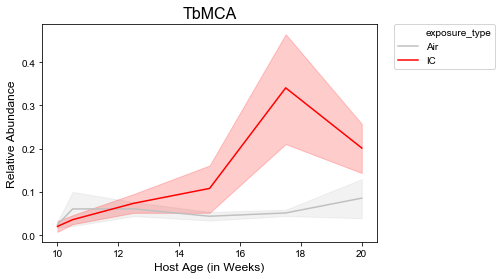

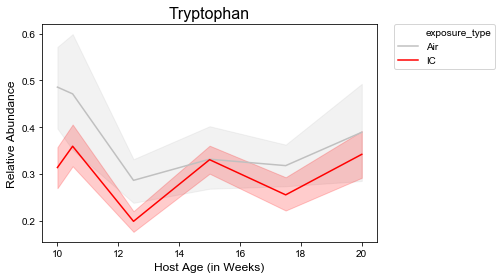

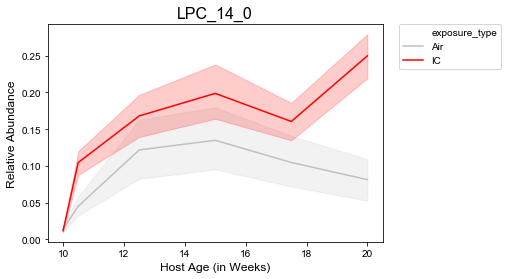

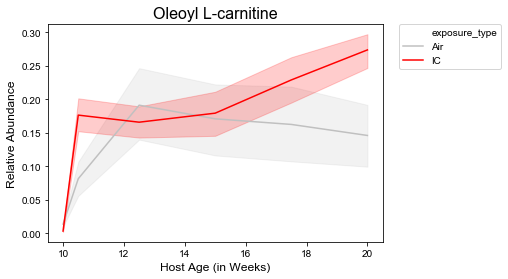

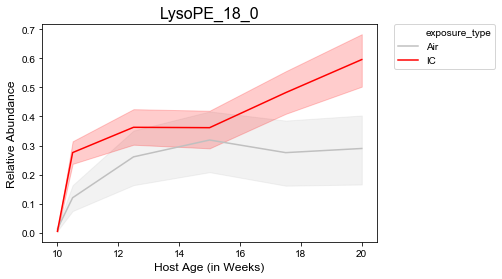

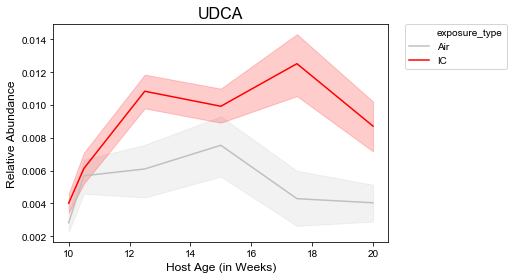

In [18]:
for mol in molelist:
    g = sns.lineplot(x='host_age', y=mol, hue='exposure_type', ci=68, 
                     palette=['silver', 'red'], data=ic_mols_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(mol, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/IC/longIC_metab_SEM_%s.svg' % mol, dpi=300, bbox_inches = "tight")
    plt.show()

In [14]:
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

10.5_Air v.s. 10.5_IC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.010e+02
10.0_Air v.s. 10.0_IC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.900e+01
12.5_Air v.s. 12.5_IC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.471e-02 U_stat=5.500e+01
17.5_Air v.s. 17.5_IC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.599e-02 U_stat=3.500e+01
15.0_Air v.s. 15.0_IC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.100e+01
20.0_Air v.s. 20.0_IC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.279e-01 U_stat=5.100e+01


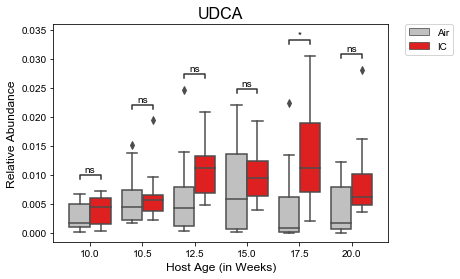

In [17]:
boxpairs = [((clar, 'Air'), (clar, 'IC')) for clar in ic_mols_relfreq_renamed['host_age'].unique()]

g = sns.boxplot(x='host_age', y='UDCA', hue='exposure_type', 
                     palette=['silver', 'red'], data=ic_mols_relfreq_renamed)

add_stat_annotation(g, data=ic_mols_relfreq_renamed, x='host_age', y='UDCA', hue='exposure_type', 
                    box_pairs=boxpairs,
                    test='Mann-Whitney', loc='inside', verbose=2)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('UDCA', fontsize=16)
plt.ylabel('Relative Abundance', fontsize=12)
plt.xlabel('Host Age (in Weeks)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IC/longIC_metab_SEM_UDCA_boxplot.png', dpi=300, bbox_inches = "tight")
plt.show()

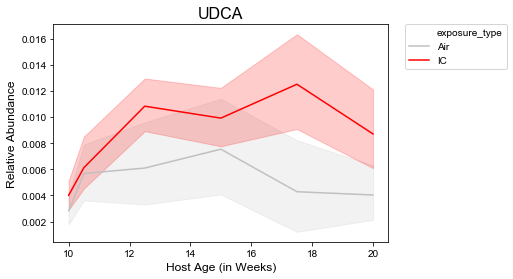

In [23]:
g = sns.lineplot(x='host_age', y='UDCA', hue='exposure_type',
                     palette=['silver', 'red'], data=ic_mols_relfreq_renamed)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('UDCA', fontsize=16)
plt.ylabel('Relative Abundance', fontsize=12)
plt.xlabel('Host Age (in Weeks)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IC/longIC_metab_SEM_UDCA_ci95.png', dpi=300, bbox_inches = "tight")
plt.show()

## IH vs IC

In [19]:
noAir_mols_relfreq = ihic_mols_relfreq[ihic_mols_relfreq['exposure_type'] != 'Air'].copy()
noAir_mols_relfreq.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A36_144_2,0.375385,0.069536,0.031704,0.012435,0.047391,0.014178,0.121005,0.144555,0.000071,0.002206,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,0.304815,0.063607,0.026294,0.021616,0.030888,0.028128,0.105111,0.064325,0.000106,0.001496,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,0.318998,0.074815,0.033500,0.014315,0.027868,0.007893,0.109808,0.103266,0.000121,0.001146,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,0.123710,0.040281,0.020029,0.003910,0.021421,0.002388,0.027319,0.053149,0.000000,0.051469,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_11,0.284601,0.313478,0.905295,0.042718,0.054074,0.027060,0.119232,0.176492,0.000711,0.000820,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [20]:
noAir_mols_relfreq_renamed = noAir_mols_relfreq.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Myristoyl-sn-glycero-3-phosphocholine from NIST14': 'LPC_14_0', 
                   'Spectral Match to Oleoyl L-carnitine from NIST14': 'Oleoyl L-carnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})

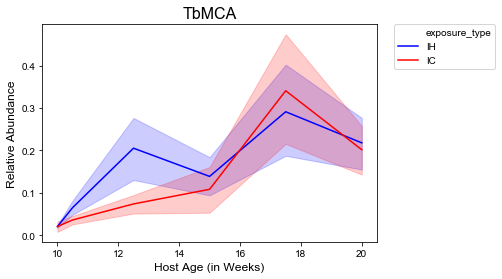

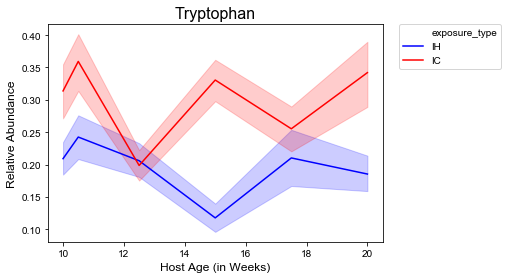

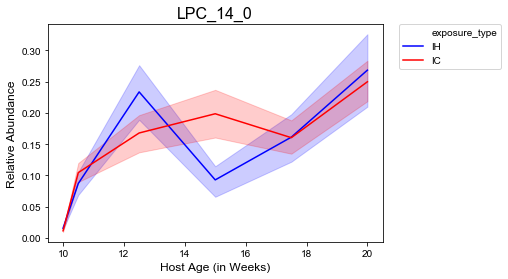

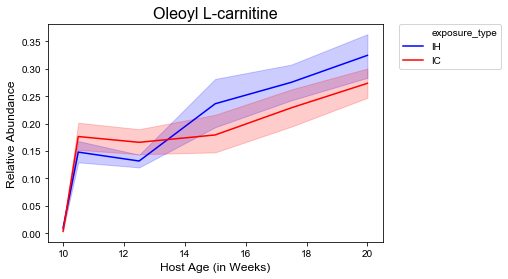

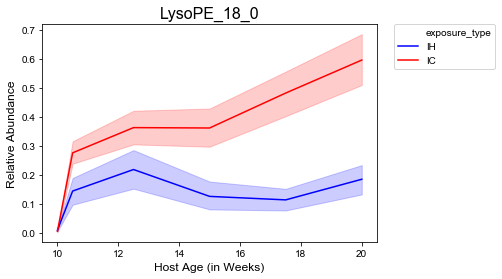

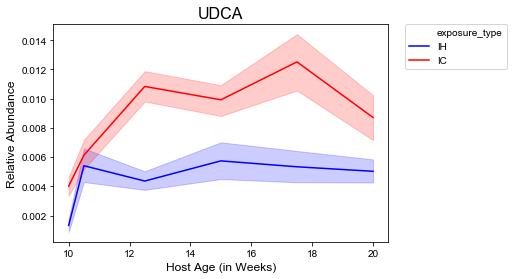

In [21]:
for mol in molelist:
    g = sns.lineplot(x='host_age', y=mol, hue='exposure_type', ci=68, 
                     palette=['blue', 'red'], data=noAir_mols_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(mol, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/noAir/long_noAir_metab_SEM_%s.svg' % mol, dpi=300, bbox_inches = "tight")
    plt.show()

# Heatmap to help figure it out

In [22]:
ihc_mols_relfreq_renamed['new_index'] = ihc_mols_relfreq_renamed['exposure_type'].astype(str) + '_' + ihc_mols_relfreq_renamed['host_age'].astype(str)
molelist2 = molelist
molelist2.append('new_index')
IHC_hm = ihc_mols_relfreq_renamed[molelist2].copy()
IHC_hm.set_index('new_index', inplace=True)
IHC_hm

,TbMCA,Tryptophan,LPC_14_0,Oleoyl L-carnitine,LysoPE_18_0,UDCA
new_index,,,,,,
Air_17.0,0.050062,0.007186,0.018420,0.034610,0.028671,0.007704
Air_10.0,0.184368,0.002724,0.009678,0.026711,0.047932,0.039081
Air_17.0,0.027795,0.005950,0.005765,0.009434,0.003308,0.025568
Air_14.5,0.035281,0.005598,0.004653,0.003157,0.013314,0.013344
Air_14.5,0.016230,0.009935,0.011950,0.021578,0.001877,0.018887
...,...,...,...,...,...,...
Air_17.0,0.142230,0.001275,0.114243,0.173648,0.409174,0.069689
Air_10.0,0.097773,0.001350,0.011039,0.003453,0.047200,0.017185
Air_19.5,0.150975,0.000419,0.024335,0.121441,0.034331,0.161330


In [23]:
IHC_hm2 = IHC_hm.groupby(IHC_hm.index, axis=0).mean()
IHC_hm2

,TbMCA,Tryptophan,LPC_14_0,Oleoyl L-carnitine,LysoPE_18_0,UDCA
new_index,,,,,,
Air_10.0,0.067153,0.008604,0.007807,0.004250,0.018897,0.025206
Air_12.0,0.095374,0.007083,0.032688,0.152468,0.172369,0.075376
Air_14.5,0.086620,0.004362,0.029101,0.120429,0.106969,0.060758
Air_17.0,0.104560,0.002666,0.025172,0.105404,0.115184,0.080573
Air_19.5,0.089906,0.003117,0.019666,0.076804,0.075540,0.056556
IHC_10.0,0.048938,0.007737,0.006053,0.004225,0.010914,0.024642
IHC_12.0,0.554446,0.002603,0.096530,0.270519,0.414337,0.111312
IHC_14.5,0.620109,0.000620,0.089422,0.228080,0.422593,0.195848
IHC_17.0,0.524957,0.000429,0.059851,0.149799,0.667710,0.110483


In [24]:
new_order = ['Air_10.0', 'Air_12.0', 'Air_14.5', 'Air_17.0', 'Air_19.5', 
             'IHC_10.0', 'IHC_12.0', 'IHC_14.5', 'IHC_17.0', 'IHC_19.5']
IHC_hm3 = IHC_hm2.reindex(new_order)
IHC_hm3

,TbMCA,Tryptophan,LPC_14_0,Oleoyl L-carnitine,LysoPE_18_0,UDCA
new_index,,,,,,
Air_10.0,0.067153,0.008604,0.007807,0.004250,0.018897,0.025206
Air_12.0,0.095374,0.007083,0.032688,0.152468,0.172369,0.075376
Air_14.5,0.086620,0.004362,0.029101,0.120429,0.106969,0.060758
Air_17.0,0.104560,0.002666,0.025172,0.105404,0.115184,0.080573
Air_19.5,0.089906,0.003117,0.019666,0.076804,0.075540,0.056556
IHC_10.0,0.048938,0.007737,0.006053,0.004225,0.010914,0.024642
IHC_12.0,0.554446,0.002603,0.096530,0.270519,0.414337,0.111312
IHC_14.5,0.620109,0.000620,0.089422,0.228080,0.422593,0.195848
IHC_17.0,0.524957,0.000429,0.059851,0.149799,0.667710,0.110483


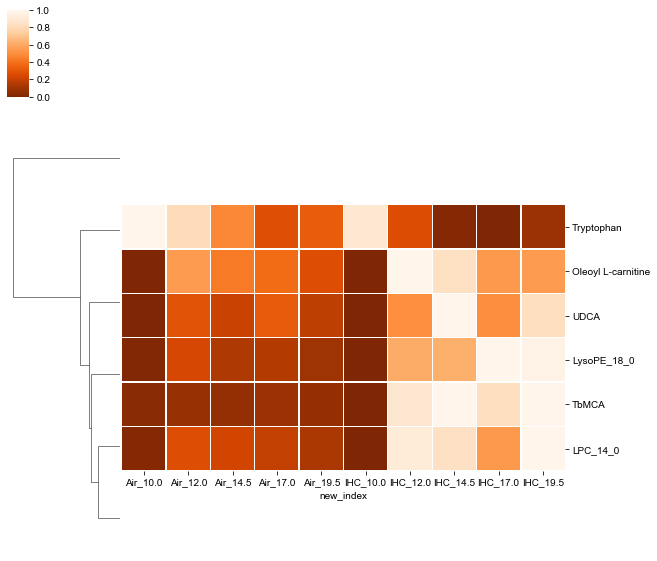

In [25]:
ax = sns.clustermap(IHC_hm3.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, square=True)
#plt.axvline(2, linewidth=3, c='k')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHC_heatmap.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [28]:
norder = ['Tryptophan', 'Oleoyl L-carnitine', 'UDCA', 'LysoPE_18_0', 'TbMCA', 'LPC_14_0']

In [29]:
IHC_hm4 = IHC_hm3[norder]
IHC_hm4

,Tryptophan,Oleoyl L-carnitine,UDCA,LysoPE_18_0,TbMCA,LPC_14_0
new_index,,,,,,
Air_10.0,0.008604,0.004250,0.025206,0.018897,0.067153,0.007807
Air_12.0,0.007083,0.152468,0.075376,0.172369,0.095374,0.032688
Air_14.5,0.004362,0.120429,0.060758,0.106969,0.086620,0.029101
Air_17.0,0.002666,0.105404,0.080573,0.115184,0.104560,0.025172
Air_19.5,0.003117,0.076804,0.056556,0.075540,0.089906,0.019666
IHC_10.0,0.007737,0.004225,0.024642,0.010914,0.048938,0.006053
IHC_12.0,0.002603,0.270519,0.111312,0.414337,0.554446,0.096530
IHC_14.5,0.000620,0.228080,0.195848,0.422593,0.620109,0.089422
IHC_17.0,0.000429,0.149799,0.110483,0.667710,0.524957,0.059851


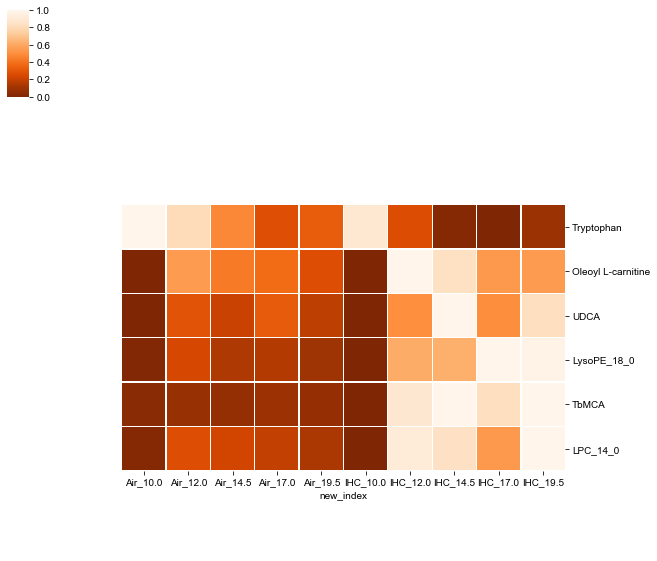

In [30]:
ax = sns.clustermap(IHC_hm4.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
#plt.axvline(2, linewidth=3, c='k')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHC_heatmap_set.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [40]:
ihic_mols_relfreq_renamed = ihic_mols_relfreq.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Myristoyl-sn-glycero-3-phosphocholine from NIST14': 'LPC_14_0', 
                   'Spectral Match to Oleoyl L-carnitine from NIST14': 'Oleoyl L-carnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})

In [41]:
ihic_mols_relfreq_renamed

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A36_144_2,0.375385,0.069536,0.031704,0.012435,0.047391,0.014178,0.121005,0.144555,0.000071,0.002206,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,0.304815,0.063607,0.026294,0.021616,0.030888,0.028128,0.105111,0.064325,0.000106,0.001496,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,0.318998,0.074815,0.033500,0.014315,0.027868,0.007893,0.109808,0.103266,0.000121,0.001146,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,0.123710,0.040281,0.020029,0.003910,0.021421,0.002388,0.027319,0.053149,0.000000,0.051469,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_139_1,0.099870,0.011379,0.001343,0.002126,0.002883,0.015178,0.019089,0.028164,0.000000,0.062247,...,Mouse 139,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A42_167_1,0.096047,0.052424,0.018021,0.001966,0.005092,0.001331,0.007512,0.054160,0.000417,0.082060,...,Mouse 167,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A42_168_1,0.172175,0.033883,0.011932,0.002903,0.015595,0.006075,0.022776,0.044525,0.000000,0.075559,...,Mouse 168,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A41_166_1,0.050670,0.031877,0.011619,0.001850,0.005911,0.002661,0.005536,0.033898,0.000119,0.074737,...,Mouse 166,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A43_174_1,0.100469,0.019256,0.009126,0.000658,0.003956,0.001544,0.018715,0.049623,0.000246,0.076707,...,Mouse 174,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [42]:
ihic_mols_relfreq_renamed['new_index'] = ihic_mols_relfreq_renamed['exposure_type'].astype(str) + '_' + ihic_mols_relfreq_renamed['host_age'].astype(str)

In [43]:
#ihic_mols_relfreq_renamedz = ihic_mols_relfreq_renamed.loc[:, ~ihic_mols_relfreq_renamed.columns.duplicated()]
#ihic_mols_relfreq_renamedz.head()

In [44]:
molelist3 = ['Tryptophan', 'Oleoyl L-carnitine', 'UDCA', 'LysoPE_18_0', 'TbMCA', 'LPC_14_0', 'new_index']
IHIC_hm = ihic_mols_relfreq_renamedz[molelist3].copy()
IHIC_hm.set_index('new_index', inplace=True)
IHIC_hm.head()

,Tryptophan,Oleoyl L-carnitine,UDCA,LysoPE_18_0,TbMCA,LPC_14_0
new_index,,,,,,
IH_10.5,0.405021,0.040763,0.002040,0.002162,0.046724,0.017564
IH_10.5,0.221454,0.234398,0.001904,0.009049,0.025142,0.030994
IH_10.5,0.089688,0.175143,0.005439,0.001033,0.015552,0.048515
IH_10.0,0.105805,0.007134,0.000458,0.003216,0.053737,0.031236
Air_10.0,0.316253,0.035258,0.000105,0.000000,0.021832,0.029237


In [45]:
IHIC_hm2 = IHIC_hm.groupby(IHIC_hm.index, axis=0).mean()
IHIC_hm2

,Tryptophan,Oleoyl L-carnitine,UDCA,LysoPE_18_0,TbMCA,LPC_14_0
new_index,,,,,,
Air_10.0,0.485769,0.013761,0.002825,0.013384,0.024174,0.013823
Air_10.5,0.471320,0.081468,0.005682,0.120645,0.060668,0.044969
Air_12.5,0.286285,0.191148,0.006098,0.261107,0.060833,0.121626
Air_15.0,0.331550,0.170780,0.007543,0.319031,0.043815,0.134859
Air_17.5,0.317805,0.162445,0.004287,0.275649,0.051420,0.104587
Air_20.0,0.389169,0.146003,0.004035,0.289926,0.085663,0.081196
IC_10.0,0.313712,0.003435,0.004011,0.005250,0.020284,0.011489
IC_10.5,0.359290,0.176333,0.006128,0.275826,0.035829,0.104568
IC_12.5,0.198642,0.165771,0.010837,0.362718,0.073625,0.167979


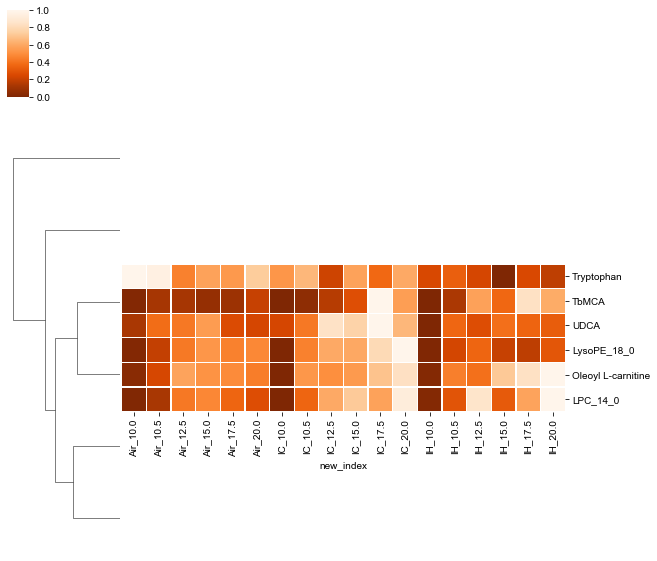

In [46]:
ax1 = sns.clustermap(IHIC_hm2.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHIC_heatmap_all.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [47]:
IHIC_hm3 = IHIC_hm2[norder]
IHIC_hm3

,Tryptophan,Oleoyl L-carnitine,UDCA,LysoPE_18_0,TbMCA,LPC_14_0
new_index,,,,,,
Air_10.0,0.485769,0.013761,0.002825,0.013384,0.024174,0.013823
Air_10.5,0.471320,0.081468,0.005682,0.120645,0.060668,0.044969
Air_12.5,0.286285,0.191148,0.006098,0.261107,0.060833,0.121626
Air_15.0,0.331550,0.170780,0.007543,0.319031,0.043815,0.134859
Air_17.5,0.317805,0.162445,0.004287,0.275649,0.051420,0.104587
Air_20.0,0.389169,0.146003,0.004035,0.289926,0.085663,0.081196
IC_10.0,0.313712,0.003435,0.004011,0.005250,0.020284,0.011489
IC_10.5,0.359290,0.176333,0.006128,0.275826,0.035829,0.104568
IC_12.5,0.198642,0.165771,0.010837,0.362718,0.073625,0.167979


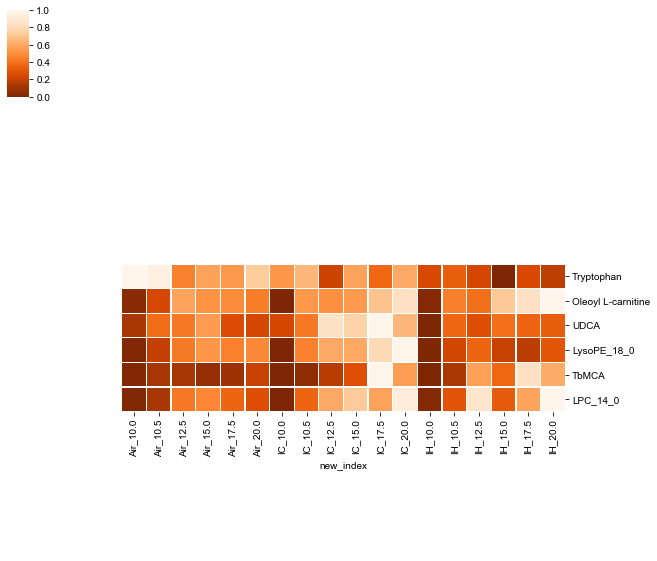

In [48]:
ax1 = sns.clustermap(IHIC_hm3.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHIC_heatmap_all_set.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [49]:
theIH = IHIC_hm2.filter(regex='IH', axis=0)
theAir = IHIC_hm2.filter(regex='Air', axis=0)
AirIH = pd.concat([theAir, theIH])

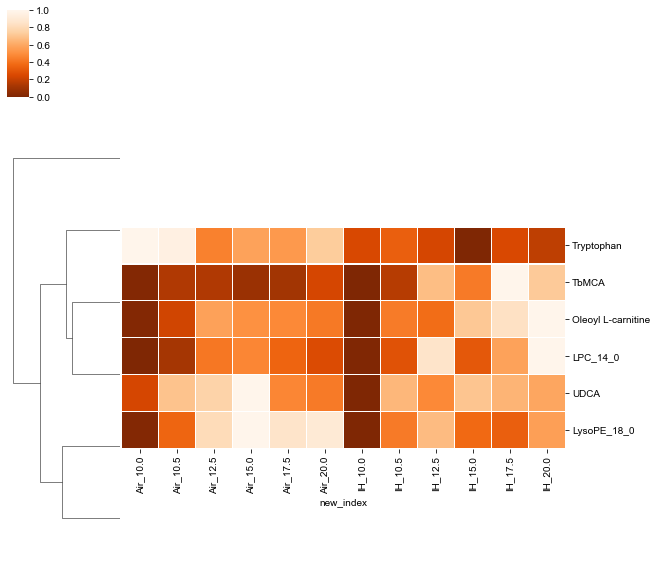

In [50]:
ax1 = sns.clustermap(AirIH.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHAir_heatmap_all.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [51]:
AirIH2 = AirIH[norder]
AirIH2

,Tryptophan,Oleoyl L-carnitine,UDCA,LysoPE_18_0,TbMCA,LPC_14_0
new_index,,,,,,
Air_10.0,0.485769,0.013761,0.002825,0.013384,0.024174,0.013823
Air_10.5,0.471320,0.081468,0.005682,0.120645,0.060668,0.044969
Air_12.5,0.286285,0.191148,0.006098,0.261107,0.060833,0.121626
Air_15.0,0.331550,0.170780,0.007543,0.319031,0.043815,0.134859
Air_17.5,0.317805,0.162445,0.004287,0.275649,0.051420,0.104587
Air_20.0,0.389169,0.146003,0.004035,0.289926,0.085663,0.081196
IH_10.0,0.209125,0.009339,0.001325,0.009193,0.020386,0.015634
IH_10.5,0.242504,0.147874,0.005410,0.144054,0.065008,0.087107
IH_12.5,0.205917,0.131632,0.004361,0.218265,0.205153,0.233702


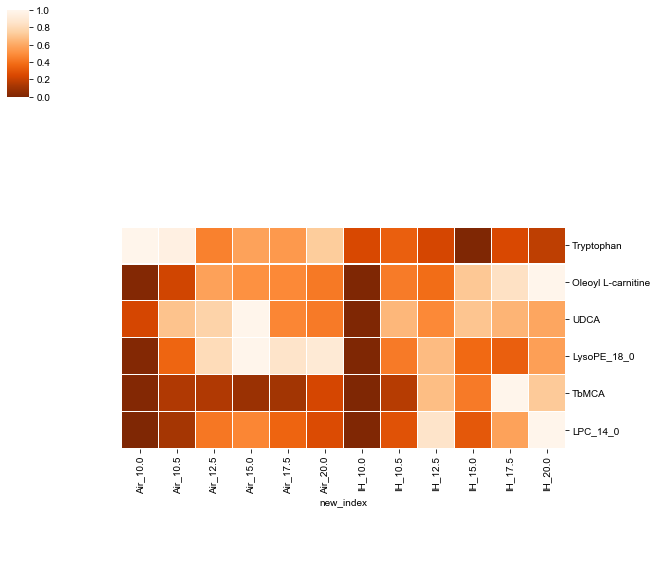

In [52]:
ax1 = sns.clustermap(AirIH2.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHAir_heatmap_all_set.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [53]:
theIC = IHIC_hm2.filter(regex='IC', axis=0)
AirIC = pd.concat([theAir, theIC])

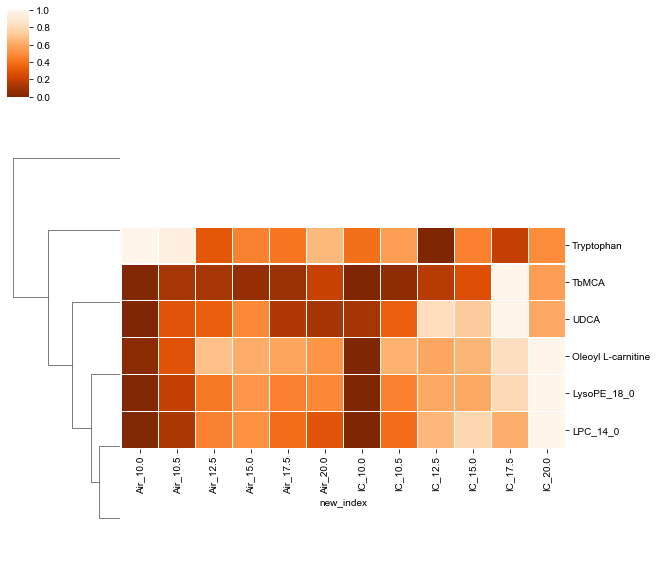

In [54]:
ax1 = sns.clustermap(AirIC.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/ICAir_heatmap_all.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [55]:
AirIC2 = AirIC[norder]
AirIC2

,Tryptophan,Oleoyl L-carnitine,UDCA,LysoPE_18_0,TbMCA,LPC_14_0
new_index,,,,,,
Air_10.0,0.485769,0.013761,0.002825,0.013384,0.024174,0.013823
Air_10.5,0.471320,0.081468,0.005682,0.120645,0.060668,0.044969
Air_12.5,0.286285,0.191148,0.006098,0.261107,0.060833,0.121626
Air_15.0,0.331550,0.170780,0.007543,0.319031,0.043815,0.134859
Air_17.5,0.317805,0.162445,0.004287,0.275649,0.051420,0.104587
Air_20.0,0.389169,0.146003,0.004035,0.289926,0.085663,0.081196
IC_10.0,0.313712,0.003435,0.004011,0.005250,0.020284,0.011489
IC_10.5,0.359290,0.176333,0.006128,0.275826,0.035829,0.104568
IC_12.5,0.198642,0.165771,0.010837,0.362718,0.073625,0.167979


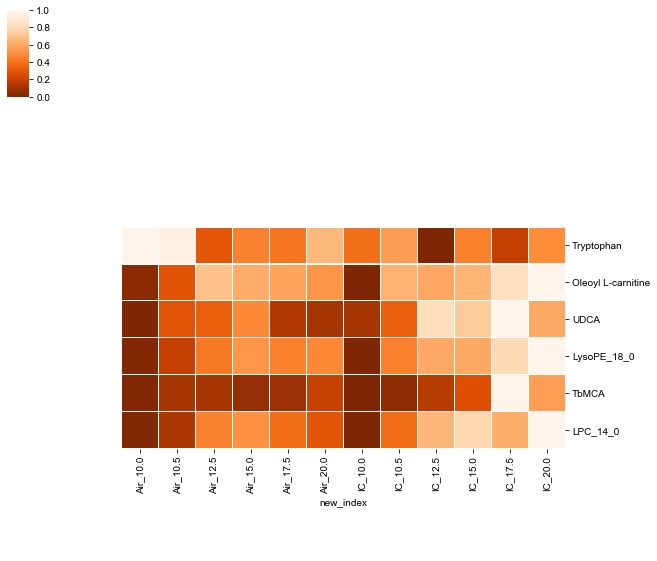

In [56]:
ax1 = sns.clustermap(AirIC2.T, standard_scale=0, cmap="Oranges_r", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/ICAir_heatmap_all_set.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

# Pie Charts

## IHC

In [57]:
moles = pd.read_csv('../data/Metabolome/longIHC_allunique_noblanks_sum_counts.txt', sep='\t', index_col=0)
moles.head()
#raw values

,"(2S,3S,4S,5R,6R)-6-[[(3S,4S,6aR,6bS,8aR,9R,12aS,14bR)-9-hydroxy-4-(hydroxymethyl)-4,6a,6b,8a,11,11,14b-heptamethyl-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicen-3-yl]oxy]-5-[(2S,3R,4S,5R,6R)-4,5-dihydroxy-6-(hydroxymethyl)-3-[(2S,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxyoxan-2-yl]oxy-3,4-dihydroxyoxane-2-carboxylic acid","(2S,4R)-4-((3R,5S,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)-2-hydroxypentanoic acid","(4R)-4-((1R,3S,5S,7R,9S,10S,12S,13R,14S,17R)-1,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4aR,5S)-9,9a-dihydroxy-3,4a,5-trimethyl-5,6,7,8,8a,9-hexahydro-4H-benzo[f][1]benzofuran-2-one","(R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pent-2-enoic acid",...,a-Muricholic acid,alpha-TOCHOPHERYL ACETATE,b-Muricholic acid,cordycepin,hyocholic acid,"methyl (4R)-4-((3R,5S,7R,9S,10S,13R,15R,17R)-3,7,15-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoate",sphingosin C16 (Artifact)-emf,taurocholic acid,taurohyodeoxycholic acid,tauroursodeoxycholic acid
A15_85_15,4.347014e+06,4.365013e+05,3.113129e+06,7.643170e+06,8.333160e+06,3.105617e+07,1.764193e+07,1.316531e+07,29758.827594,6.768136e+06,...,2.050625e+07,0.0,2.226068e+07,2.153714e+07,7.557172e+05,1.189346e+07,4.386402e+07,8.742650e+05,2.131643e+05,0.000000
A15_86_01,6.162584e+06,1.929600e+07,9.248853e+06,1.671268e+07,3.592560e+07,1.598971e+08,1.184836e+08,1.029479e+08,70848.402187,3.520016e+07,...,2.224914e+08,0.0,4.599753e+08,1.086849e+08,9.029585e+06,1.454446e+08,3.501207e+07,1.957585e+06,5.283425e+06,80722.124555
A15_86_15,3.773914e+06,1.334396e+05,7.236250e+05,3.936169e+06,1.475118e+07,1.376922e+07,4.943581e+06,2.040354e+07,34407.511004,7.293671e+06,...,2.137246e+08,0.0,2.413675e+07,2.325193e+07,2.942093e+06,8.638876e+06,5.019532e+07,6.688261e+05,3.792855e+04,0.000000
A15_85_10,3.006859e+07,1.703983e+06,6.540154e+06,8.387228e+06,8.639797e+06,2.926899e+07,3.393049e+07,6.837407e+07,0.000000,2.277938e+07,...,1.405377e+08,0.0,1.389608e+08,6.475354e+07,2.988641e+05,2.476160e+07,3.164700e+07,4.734618e+05,4.367727e+05,0.000000
A15_86_10,6.716596e+06,1.667015e+05,5.333426e+06,1.054720e+07,2.291112e+07,1.192051e+07,8.587482e+06,6.986774e+07,145728.305689,2.414387e+07,...,1.987014e+08,0.0,7.547292e+07,3.449575e+07,6.932378e+05,1.750634e+07,3.345745e+07,4.218966e+05,4.714934e+05,0.000000


In [58]:
sum_total = moles.values.sum()

In [59]:
bile_acids = [col for col in moles.columns if 'holic' in col]
new_bile_acids = [col for col in moles.columns if 'cyclopenta[a]phenanthren' in col]
all_bile_acids = bile_acids + new_bile_acids
all_bile_acids

['Alanine conjugated cholic acid',
 'Cholic acid',
 'Deoxycholic acid',
 'Hyodeoxycholic acid',
 'Lithocholic acid',
 'Spectral Match to 12-Ketodeoxycholic acid from NIST14',
 'Spectral Match to Cholic acid from NIST14',
 'Spectral Match to Tauroursodeoxycholic acid from NIST14',
 'Spectral Match to Ursodeoxycholic acid from NIST14',
 'Tauro-b-muricholic acid',
 'Taurocholic Acid Sulfate',
 'Taurocholic acid',
 'Taurodeoxycholic acid',
 'Ursodeoxycholic acid',
 'a-Muricholic acid',
 'b-Muricholic acid',
 'hyocholic acid',
 'taurocholic acid',
 'taurohyodeoxycholic acid',
 'tauroursodeoxycholic acid',
 '(2S,4R)-4-((3R,5S,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)-2-hydroxypentanoic acid',
 '(4R)-4-((1R,3S,5S,7R,9S,10S,12S,13R,14S,17R)-1,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid',
 '(4R)-4-((3R,5R,6R,7S,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1

In [60]:
BAs = moles[all_bile_acids].values.sum()

In [61]:
cholines = [col for col in moles.columns if 'choline' in col]
more_cholines = [col for col in moles.columns if 'PC' in col]
all_cholines = cholines + more_cholines
all_cholines

['ReSpect:PS081304 1-Lauroyl-2-Hydroxy-sn-Glycero-3-Phosphocholine|12:0 LysoPC|1-Dodecanoyllysolecithin|Phosphocholine,1-Lauroyl-2-Hydroxy-sn-Glycero-3-',
 'Spectral Match to 1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(1Z-Hexadecenyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(9Z-Octadecenoyl)-2-tetradecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Heptadecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-2-octadecadienoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecyl-sn-glycero-3-phosphocholine fr

In [62]:
PPC = moles[all_cholines].values.sum()

In [64]:
carnitines = [col for col in moles.columns if 'carnit' in col]
carnitines.append("LAUROYLCARNITINE")
carnitines

['Spectral Match to Oleoyl L-carnitine from NIST14',
 'Spectral Match to Palmitoylcarnitine from NIST14',
 'LAUROYLCARNITINE']

In [65]:
CARN = moles[carnitines].values.sum()

In [66]:
PE = [col for col in moles.columns if 'phosphoethanolamine' in col]
PE

['Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14',
 'Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14',
 'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14']

In [67]:
PEsum = moles[PE].values.sum()

In [70]:
other = 1 - ((BAs)/sum_total + PPC/sum_total + CARN/sum_total + PEsum/sum_total)
print((BAs/sum_total)*100)
print((PPC/sum_total)*100)
print((CARN/sum_total)*100)
print((PEsum/sum_total)*100)
print(("Other", other*100))

6.474944765140572
6.688415012915494
0.3533774182558865
0.2770683374592697
('Other', 86.20619446622878)


### Each Condition

In [72]:
All_moles = pd.merge(moles, ihc_metab_md['exposure_type'], left_index=True, right_index=True)

In [73]:
IHC_moles = All_moles[All_moles['exposure_type'] == "IHC"].copy()
Air_moles = All_moles[All_moles['exposure_type'] == "Air"].copy()

In [74]:
IHC_moles.drop(columns=['exposure_type'], inplace=True)
Air_moles.drop(columns=['exposure_type'], inplace=True)

In [76]:
IHCsum_total = IHC_moles.values.sum()
IHC_PEsum = IHC_moles[PE].values.sum()
IHC_PPC = IHC_moles[all_cholines].values.sum()
IHC_BAs = IHC_moles[bile_acids].values.sum()
IHC_CARN = IHC_moles[carnitines].values.sum()

In [81]:
print("PE", (IHC_PEsum/IHCsum_total)*100)
print("PPC", (IHC_PPC/IHCsum_total)*100)
print("BAs", (IHC_BAs/IHCsum_total)*100)
print("carnitines", (IHC_CARN/IHCsum_total)*100)
IHC_other = 1 - (IHC_BAs/IHCsum_total + IHC_PPC/IHCsum_total + IHC_CARN/IHCsum_total + IHC_PEsum/IHCsum_total)
print("Other", IHC_other*100)

PE 0.5604152944747739
PPC 11.537463513568657
BAs 7.7604916248939055
carnitines 0.5174548176525754
Other 79.62417474941009


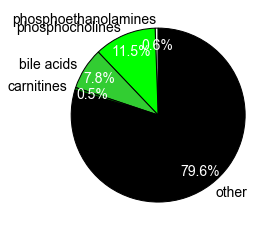

In [85]:
labels = [ "phosphoethanolamines", "phosphocholines", 'bile acids', "carnitines", "other" ]
sizes = [0.56, 11.54, 7.76,  0.52, 79.62]
colors = ["honeydew","lime", "limegreen", 'green', "k"]

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.1f%%',
                          pctdistance=0.8,colors=colors, startangle=90, 
                         wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('w')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/cIHC_molecule_piechart_IHC.svg', dpi=300, bbox_inches="tight")
plt.show()

In [83]:
Airsum_total = Air_moles.values.sum()
Air_PEsum = Air_moles[PE].values.sum()
Air_PPC = Air_moles[all_cholines].values.sum()
Air_BAs = Air_moles[bile_acids].values.sum()
Air_CARN = Air_moles[carnitines].values.sum()

In [84]:
print("PE", (Air_PEsum/Airsum_total)*100)
print("PPC", (Air_PPC/Airsum_total)*100)
print("BAs", (Air_BAs/Airsum_total)*100)
print("carnitines", (Air_CARN/Airsum_total)*100)
Air_other = 1 - (Air_BAs/Airsum_total + Air_PPC/Airsum_total + Air_CARN/Airsum_total + Air_PEsum/Airsum_total)
print("Other", Air_other*100)

PE 0.13430558998735667
PPC 4.24524959526138
BAs 4.745192907437752
carnitines 0.2707079568201809
Other 90.60454395049334


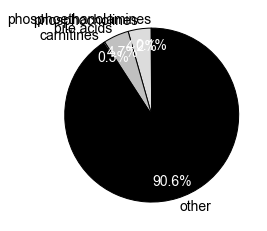

In [86]:
labels = [ "phosphoethanolamines", "phosphocholines", 'bile acids', "carnitines", "other" ]
sizes = [0.13, 4.245, 4.745,  0.271, 90.60]
colors = ["whitesmoke","gainsboro", 'silver', 'darkgrey', "k"]

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.1f%%',
                          pctdistance=0.8,colors=colors, startangle=90, 
                         wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('w')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/cAir_molecule_piechart_Air.svg', dpi=300, bbox_inches="tight")
plt.show()

## IH/IC

In [ ]:
###IH###Blue
labels = [ "phosphoethanolamines", "phosphocholines", 'bile acids', "carnitines", "other" ]
sizes = [1.1, 32.1, 13.0,  1.0, 52.8]
colors = ["azure","skyblue", "blue", 'navy', "grey"]

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.1f%%',
                          pctdistance=0.8,colors=colors, startangle=90, 
                         wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('w')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/cIHC_molecule_piechart_IHC.svg', dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
###IC### RED
labels = [ "phosphoethanolamines", "phosphocholines", 'bile acids', "carnitines", "other" ]
sizes = [0.7, 25.5, 9.6,  1.3, 62.8]
colors = ["mistyrose","lightcoral", 'red', 'maroon', "grey"]

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.1f%%',
                          pctdistance=0.8,colors=colors, startangle=90, 
                         wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('w')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/cAir_molecule_piechart_Air.svg', dpi=300, bbox_inches="tight")
plt.show()